# ODRE injections quotidiennes consolidees

Travail et analyse sur ce fichier csv

In [1]:
import pandas as pd
import sys
import os
from pathlib import Path

# Add the project root directory to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
	sys.path.insert(0, project_root)

from src.toolkit.utils.loading import DataFrameLoader
from src.toolkit.analysis.analyser import DataAnalyzer
from src.toolkit.utils.plotter import Plotter
from src.toolkit.utils.trans_to_pytorch import DataTransformer

In [5]:
# Importe un loader
loader = DataFrameLoader()

In [15]:
PATH_TO_DATA = '../data/raw/'
THEME = 'energy/'
FILE = 'ODRE_injections_quotidiennes_consolidees_rpt.csv'
DELIMETER = ';'

In [16]:
csv_file = PATH_TO_DATA + THEME + FILE
    
# load dataframe
dataframe = loader.load(csv_file, delimeter=DELIMETER)


In [13]:
analyzer = DataAnalyzer(dataframe)
analyzer.summary()

,00h00,00h30,01h00,01h30,02h00,02h30,03h00,03h30,04h00,04h30,...,20h00,20h30,21h00,21h30,22h00,22h30,23h00,23h30,Nb points d'injection,Energie journalière (MWh)
count,27138.000000,27138.000000,27138.000000,27138.000000,27138.000000,27138.000000,27138.000000,27138.000000,27138.000000,27138.000000,...,27138.000000,27138.000000,27138.000000,27138.000000,27138.000000,27138.000000,27138.000000,27138.000000,27138.000000,2.713800e+04
mean,4995.613197,4951.965886,4782.262166,4782.257744,4740.469525,4732.402623,4654.307272,4653.500900,4616.025679,4626.048622,...,5354.459534,5317.018200,5222.306459,5187.671508,5090.355137,5073.202621,5155.993149,5055.037126,102.162798,1.192404e+05
std,12151.733827,12128.764882,11978.991436,11996.480423,11944.751226,11952.929156,11845.572174,11844.989179,11797.370067,11827.216783,...,12316.766745,12316.219481,12279.663021,12287.202907,12234.964097,12225.766282,12249.367977,12197.166996,170.390679,2.893172e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.456000,15.336000,9.910750,2.646500,0.000000,0.000000,0.000000,0.000000,20.000000,1.004473e+03
50%,97.680660,97.105500,96.911500,96.828000,96.863000,96.713500,96.278000,96.113000,95.783000,96.004965,...,97.788750,97.320500,97.293350,97.517500,97.909750,97.659250,97.662500,97.601500,46.000000,2.761042e+03
75%,2347.739589,2161.655500,1699.147750,1664.906414,1597.455762,1593.482250,1485.554282,1477.402000,1439.247250,1459.320703,...,3027.308571,3001.512956,2878.704955,2817.725500,2568.259500,2523.382953,2659.804967,2491.939083,110.000000,5.522606e+04
max,57901.295000,58286.599000,57415.013000,57642.571000,57280.460000,57881.444000,57372.347000,57998.816000,57816.718000,58199.876000,...,58607.729000,58616.624000,58627.604000,58630.962000,58544.500000,58269.033000,58334.038000,57962.026000,748.000000,1.398443e+06


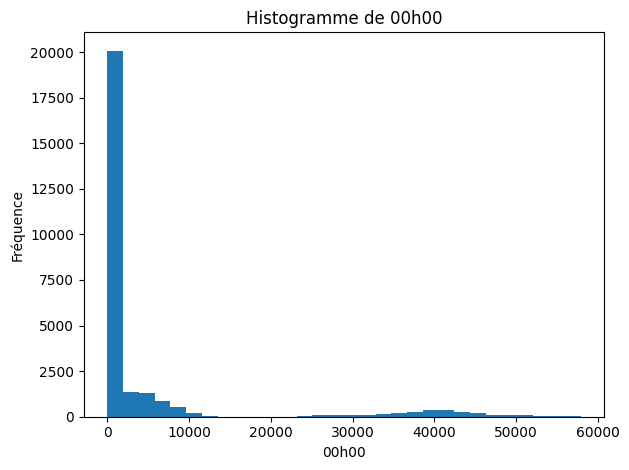

In [14]:
plotter = Plotter()
plotter.histogram(dataframe, '00h00')

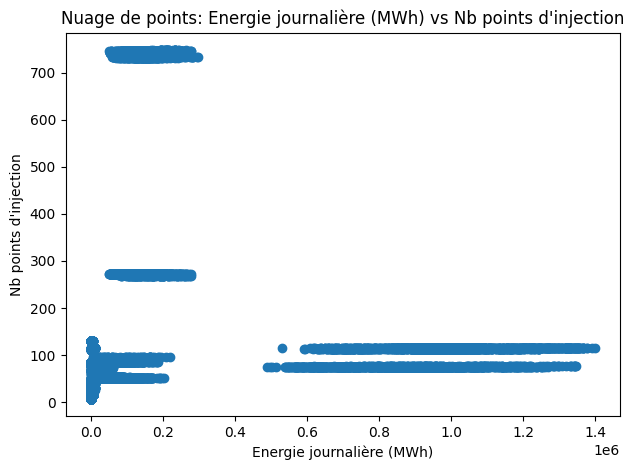

In [18]:
plotter.scatter(dataframe, 'Energie journalière (MWh)', "Nb points d'injection")

In [22]:
# Afficher les 5 premières lignes
dataframe.head()


,Date,Filière,Puissance maximale,00h00,00h30,01h00,01h30,02h00,02h30,03h00,...,20h30,21h00,21h30,22h00,22h30,23h00,23h30,Nb points d'injection,Energie journalière (MWh),Qualité
0,2023-11-01,Eolien,Supérieure à 1MW et Inférieure ou égale à 12MW,98.646000,100.818000,104.568000,99.842000,116.054000,101.556000,110.876000,...,97.158000,119.668000,128.615000,142.858000,148.172000,159.316000,163.831000,31,2714.957000,Consolidée
1,2023-11-06,Hydraulique,Supérieure à 12MW,7493.166515,7243.615556,7016.016328,6902.829969,7092.614869,7214.281787,7143.952891,...,11444.101247,10820.362426,10595.881004,9582.279057,9301.720723,9679.070462,8619.923050,272,203127.119499,Consolidée
2,2023-11-13,Hydraulique,Supérieure à 12MW,7004.352912,7154.369217,6741.086084,7004.669116,6829.562854,6577.762935,6073.520645,...,8392.134444,7053.429417,6681.539751,6507.922665,6564.554600,7173.043417,7075.403643,272,170970.399437,Consolidée
3,2023-11-15,Thermique non renouvelable,Supérieure à 12MW,2096.023200,2109.224990,1322.935985,1515.861055,1314.091015,1646.090095,1125.418120,...,4090.640000,3878.309000,3718.294000,3132.341000,3016.058000,3322.646000,3474.756000,52,68019.680092,Consolidée
4,2023-11-19,Eolien,Supérieure à 1MW et Inférieure ou égale à 12MW,101.366000,136.000000,129.070000,125.706000,131.310000,110.814000,109.811000,...,128.835000,127.580000,121.102000,121.039000,106.976000,107.590000,106.595000,31,2668.059500,Consolidée


In [23]:
dataframe.tail(2)


,Date,Filière,Puissance maximale,00h00,00h30,01h00,01h30,02h00,02h30,03h00,...,20h30,21h00,21h30,22h00,22h30,23h00,23h30,Nb points d'injection,Energie journalière (MWh),Qualité
27136,2025-06-30,Solaire,Supérieure à 1MW et Inférieure ou égale à 12MW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42.018,19.382,3.772,0.0,0.0,0.0,0.0,87,4336.96675,Consolidée
27137,2025-06-30,Thermique non renouvelable,Supérieure à 1MW et Inférieure ou égale à 12MW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,9,0.00000,Consolidée


In [24]:
dataframe.sample(3)

,Date,Filière,Puissance maximale,00h00,00h30,01h00,01h30,02h00,02h30,03h00,...,20h30,21h00,21h30,22h00,22h30,23h00,23h30,Nb points d'injection,Energie journalière (MWh),Qualité
16395,2020-03-06,Thermique non renouvelable,Inférieure ou égale à 1MW,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,12,0.000000e+00,Consolidée
5518,2022-01-31,Hydraulique,Supérieure à 12MW,2665.255,2887.859,2514.523,2364.151,2332.238,2151.086,1855.687,...,8182.530,6098.754,4723.724,4260.410,4140.007,4712.175,3658.525,732,1.022808e+05,Consolidée
5475,2021-01-01,Nucléaire,Supérieure à 12MW,50599.100,50534.878,50466.809,49737.850,48783.143,48356.494,48137.295,...,51301.834,51423.763,51330.546,51286.161,51066.636,51066.144,51044.887,112,1.203201e+06,Consolidée


In [17]:
# Afficher les noms des colonnes
print(dataframe.columns)

# Afficher le nombre de lignes et colonnes
print(dataframe.shape)


Index(['Date', 'Filière', 'Puissance maximale', '00h00', '00h30', '01h00',
       '01h30', '02h00', '02h30', '03h00', '03h30', '04h00', '04h30', '05h00',
       '05h30', '06h00', '06h30', '07h00', '07h30', '08h00', '08h30', '09h00',
       '09h30', '10h00', '10h30', '11h00', '11h30', '12h00', '12h30', '13h00',
       '13h30', '14h00', '14h30', '15h00', '15h30', '16h00', '16h30', '17h00',
       '17h30', '18h00', '18h30', '19h00', '19h30', '20h00', '20h30', '21h00',
       '21h30', '22h00', '22h30', '23h00', '23h30', 'Nb points d'injection',
       'Energie journalière (MWh)', 'Qualité'],
      dtype='object')
(27138, 54)


In [25]:
# Afficher le type de chaque colonnes
dataframe.dtypes


Date                          object
Filière                       object
Puissance maximale            object
00h00                        float64
00h30                        float64
01h00                        float64
01h30                        float64
02h00                        float64
02h30                        float64
03h00                        float64
03h30                        float64
04h00                        float64
04h30                        float64
05h00                        float64
05h30                        float64
06h00                        float64
06h30                        float64
07h00                        float64
07h30                        float64
08h00                        float64
08h30                        float64
09h00                        float64
09h30                        float64
10h00                        float64
10h30                        float64
11h00                        float64
11h30                        float64
1

In [26]:
# Afficher des statistiques descriptives
dataframe.describe()

,00h00,00h30,01h00,01h30,02h00,02h30,03h00,03h30,04h00,04h30,...,20h00,20h30,21h00,21h30,22h00,22h30,23h00,23h30,Nb points d'injection,Energie journalière (MWh)
count,27138.000000,27138.000000,27138.000000,27138.000000,27138.000000,27138.000000,27138.000000,27138.000000,27138.000000,27138.000000,...,27138.000000,27138.000000,27138.000000,27138.000000,27138.000000,27138.000000,27138.000000,27138.000000,27138.000000,2.713800e+04
mean,4995.613197,4951.965886,4782.262166,4782.257744,4740.469525,4732.402623,4654.307272,4653.500900,4616.025679,4626.048622,...,5354.459534,5317.018200,5222.306459,5187.671508,5090.355137,5073.202621,5155.993149,5055.037126,102.162798,1.192404e+05
std,12151.733827,12128.764882,11978.991436,11996.480423,11944.751226,11952.929156,11845.572174,11844.989179,11797.370067,11827.216783,...,12316.766745,12316.219481,12279.663021,12287.202907,12234.964097,12225.766282,12249.367977,12197.166996,170.390679,2.893172e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.456000,15.336000,9.910750,2.646500,0.000000,0.000000,0.000000,0.000000,20.000000,1.004473e+03
50%,97.680660,97.105500,96.911500,96.828000,96.863000,96.713500,96.278000,96.113000,95.783000,96.004965,...,97.788750,97.320500,97.293350,97.517500,97.909750,97.659250,97.662500,97.601500,46.000000,2.761042e+03
75%,2347.739589,2161.655500,1699.147750,1664.906414,1597.455762,1593.482250,1485.554282,1477.402000,1439.247250,1459.320703,...,3027.308571,3001.512956,2878.704955,2817.725500,2568.259500,2523.382953,2659.804967,2491.939083,110.000000,5.522606e+04
max,57901.295000,58286.599000,57415.013000,57642.571000,57280.460000,57881.444000,57372.347000,57998.816000,57816.718000,58199.876000,...,58607.729000,58616.624000,58627.604000,58630.962000,58544.500000,58269.033000,58334.038000,57962.026000,748.000000,1.398443e+06


In [27]:
dataframe.isna().sum()

Date                         0
Filière                      0
Puissance maximale           0
00h00                        0
00h30                        0
01h00                        0
01h30                        0
02h00                        0
02h30                        0
03h00                        0
03h30                        0
04h00                        0
04h30                        0
05h00                        0
05h30                        0
06h00                        0
06h30                        0
07h00                        0
07h30                        0
08h00                        0
08h30                        0
09h00                        0
09h30                        0
10h00                        0
10h30                        0
11h00                        0
11h30                        0
12h00                        0
12h30                        0
13h00                        0
13h30                        0
14h00                        0
14h30   

In [ ]:
# ingestor = DataIngestor('dataset.csv')
# df_raw = ingestor.read()

# cleaner = DataCleaner(df_raw)
# df_clean = cleaner.drop_missing(thresh=0.6)
# df_clean = cleaner.fill_missing('mean')

# preprocessor = FeaturePreprocessor(df_clean)
# pipeline = preprocessor.build_pipeline()
# X_tensor = torch.tensor(preprocessor.transform(pipeline).toarray(), dtype=torch.float32)
